# Random Forest Classification

## Importing the libraries

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [190]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [191]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [192]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


## Splitting the dataset into the Training set and Test set

In [193]:
# We are using a seed here because we will do parameter search

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [194]:
#print(X_train.size)
#print(y_train.size)
#print(X_test.size)
#print(y_test.size)

## Feature Scaling

In [195]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [196]:
#print(X_train)
#print(X_test)

## Training the Random Forest Classification model on the Training set

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
# Initiate the model
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

# Criterion measures the quality of a split
# 'gini'    for impurity
# 'entropy' for information gain

In [199]:
# Fit the model
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

## Predicting a new result

In [200]:
# Predict the purchasing of the first customer in the test set (e.g.: 30 years old and 87000 dollars as salary)
# Do not forget the data is meant to be scaled! We need to transform it.
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [201]:
# np.set_printoptions(precision=2) # For visualization purposes, not required when result is 0/1

# Get ALL predictions
y_pred = classifier.predict(X_test)

# View y_test and y_pred together
# # reshape will allow to view this vertically! Also axis=1
print("y_test | y_pred")
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),axis=1))

y_test | y_pred
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [202]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) # 89%

[[54  4]
 [ 5 17]]


0.8875

In [203]:
# Print the confusion matrix values, with accurate labels!!!
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(54, 4, 5, 17)

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


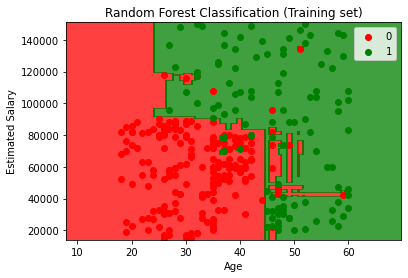

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


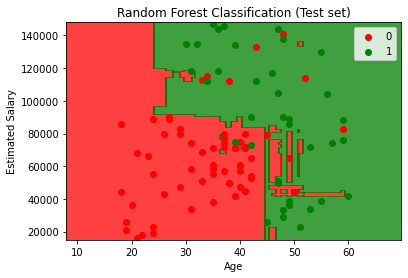

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Model Optimization Attempts

## Find the Best Number of Trees

In [204]:
def get_opt(n_estimators, X_train, X_test, y_train, y_test):

    #classifier = RandomForestClassifier(n_estimators = n_estimators,criterion = 'entropy',random_state = 0)
    classifier = RandomForestClassifier(n_estimators = n_estimators,criterion = 'entropy',random_state = 0)

    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    return(accuracy_score(y_test, y_pred))

scores = {estimator: get_opt(estimator, X_train, X_test, y_train, y_test) for estimator in range(1,100)}

best_tree_size = max(scores, key=scores.get)

print(best_tree_size)

45


In [205]:
classifier = RandomForestClassifier(n_estimators = best_tree_size, criterion = 'entropy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) # 94%

[[55  3]
 [ 2 20]]


0.9375

## Parameter Grid Setup for ML Model Optimization

In [206]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
min_samples_split = [2, 4, 8, 16]
min_samples_leaf = [2, 4, 8, 16]
bootstrap = [True, False]
 
param_grid = {'n_estimators': n_estimators,
                'criterion': criterion,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

In [207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
 
rf_classifier = RandomForestClassifier()
 
# `n_jobs` means parallel jobs to run -> -1 means using all processors
grid_search = GridSearchCV(rf_classifier, param_grid, cv = 3, verbose = 1, n_jobs = -1)

grid_fit = grid_search.fit(X_train, y_train)

grid_fit.best_params_

Fitting 3 folds for each of 19200 candidates, totalling 57600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 185 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 435 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 785 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 1235 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 1785 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2435 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3185 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4035 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4985 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 6035 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 7185 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 8435 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 9785 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 11235 tasks      |

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 16,
 'min_samples_split': 2,
 'n_estimators': 10}

In [208]:
# Use best params from the grid search
grid_classifier = RandomForestClassifier(n_estimators=10, 
                                        criterion='entropy',
                                        bootstrap=True,
                                        max_depth=80,
                                        max_features='auto',
                                        min_samples_leaf=16,
                                        min_samples_split=2,
                                        random_state=0)
grid_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=80, min_samples_leaf=16,
                       n_estimators=10, random_state=0)

In [209]:
print(grid_classifier.predict(sc.transform([[30,87000]])))

[0]


In [210]:
y_pred = grid_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) # 95% !!!

[[55  3]
 [ 1 21]]


0.95

In [211]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(55, 3, 1, 21)